# 2.El Otomobil Fiyat Tahmini
Satıcılar otomobil fiyatlarını belirlerken motor gücü, motor hacmi, otomobilin yaşı, otomobilin kaç km yaptığı, değişen-boyalı parça sayısı ve diğer parametreler gibi birkaç faktöre bağlı olarak otomobil fiyatlarını belirlediklerini görürüz. Bir satıcı otomobili ilana koyarken ortalama kaç para ettiğini bilmek isteyebilir ya da tam tersi olarak bir müşteri satın alacağı otomobilin ortalama fiyatını öğrenmek isteyebilir. Bu çalışma, geçmiş ikinci el ilan verilerinden yola çıkarak otomobil özellikleri ile fiyat arasında istatistiksel bir ilişki kurmayı ve bu ilişki üzerinden fiyat tahmin modelleri geliştirmeyi hedeflemektedir. Böylece hem alıcılar hem de satıcılar için karar destek sağlayan bir sistem oluşturulması amaçlanmaktadır.

* Veri seti içerisinde bulunan sütunların isimleri ve açıklamaları:
  1. id - Her otomobil için benzersiz numara
  2. marka - Otomobilin markası
  3. seri - Otomobilin serisi veya alt modeli
  4. model - Otomobilin model tipi
  5. yil - Otomobilin üretim yılı
  6. kilometre - Otomobilin o zamana kadar yaptığı toplam yol (km cinsinden)
  7. vites_tipi - Otomobilin vites türü (örneğin: Otomatik, Manuel, Yarı Otomatik)
  8. yakit_tipi - Otomobilin yakıt türü (örneğin: Benzin, Dizel, Hibrit, LPG&Benzin, Elektrik)
  9. kasa_tipi - Otomobilin gövde tipi (örneğin: Sedan, Hatchback)
  10. renk - Otomobilin dış rengi
  11. motor_hacmi - Otomobilin motor hacminin ortalaması (cm3)
  12. motor_gucu - Otomobilin motor gücünün ortalaması (hp)
  13. degisen_sayisi - Otomobilde kaç adet değişen parça olduğunun sayısı
  14. boyali_sayisi - Otomobilde kaç adet boyalı parça olduğunun saysısı 
  15. kimden - İlan sahibinin türü (örneğin: Sahibinden, Galeriden)
  16. fiyat - Otomobilin satış fiyatı (TL cinsinden)


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from warnings import filterwarnings
import missingno as msno
filterwarnings("ignore")

In [4]:
df = pd.read_csv("araba_bilgileri.csv")

In [6]:
df.head(8)

,id,marka,seri,model,yil,kilometre,vites_tipi,yakit_tipi,kasa_tipi,renk,motor_hacmi,motor_gucu,degisen_sayisi,boyali_sayisi,kimden,fiyat
0,1,Lexus,ES,300h Business Plus,2023.0,43000.0,Otomatik,Benzin,Sedan,Siyah,2250.0,213.0,1.0,1.0,Galeriden,4950000.0
1,2,Lexus,GS,200t Luxury,2023.0,25000.0,Otomatik,Benzin,Hatchback/5,Mavi,NaN,213.0,1.0,0.0,Galeriden,1265000.0
2,3,Lexus,LS,500h Exclusive,2021.0,23665.0,Otomatik,Benzin,Sedan,Siyah,3250.0,363.0,0.0,0.0,Galeriden,9000000.0
3,4,Kuba,City,NaN,2024.0,0.0,Otomatik,Elektrik,Hatchback/3,Kahverengi,NaN,50.0,0.0,0.0,Galeriden,279999.0
4,5,Lexus,GS,200t F Sport,2016.0,90500.0,Otomatik,Benzin,Sedan,Beyaz,1900.0,238.0,0.0,0.0,Galeriden,2745000.0
5,6,Infiniti,I30,3.0,1996.0,230000.0,Otomatik,LPG & Benzin,Sedan,Yeşil,2988.0,190.0,NaN,NaN,Sahibinden,225000.0
6,7,Infiniti,I30,3.0,1996.0,298000.0,Otomatik,LPG & Benzin,Sedan,Yeşil,2988.0,190.0,0.0,7.0,Sahibinden,475000.0
7,8,Infiniti,Q50,2.0,2016.0,150000.0,Otomatik,Benzin,Sedan,Beyaz,1900.0,213.0,0.0,0.0,Galeriden,1950000.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50755 entries, 0 to 50754
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              50755 non-null  int64  
 1   marka           50597 non-null  object 
 2   seri            50597 non-null  object 
 3   model           50424 non-null  object 
 4   yil             50597 non-null  float64
 5   kilometre       50597 non-null  float64
 6   vites_tipi      50572 non-null  object 
 7   yakit_tipi      50597 non-null  object 
 8   kasa_tipi       50580 non-null  object 
 9   renk            50596 non-null  object 
 10  motor_hacmi     49128 non-null  float64
 11  motor_gucu      49094 non-null  float64
 12  degisen_sayisi  40339 non-null  float64
 13  boyali_sayisi   40339 non-null  float64
 14  kimden          50597 non-null  object 
 15  fiyat           50597 non-null  float64
dtypes: float64(7), int64(1), object(8)
memory usage: 6.2+ MB


## Verinin Temizlenmesi
* Yararsız Verinin Çıkarılması ve Düzenlenmesi
* Kayıp Veri Sorunu 

### Yararsız Verinin Çıkarılması ve Düzenlenmesi 
* id sütunu veri hakkında herhangi bir bilgi vermediği için çıkarılacaktır.

In [12]:
df.drop("id", axis=1, inplace=True)
df.head()

,marka,seri,model,yil,kilometre,vites_tipi,yakit_tipi,kasa_tipi,renk,motor_hacmi,motor_gucu,degisen_sayisi,boyali_sayisi,kimden,fiyat
0,Lexus,ES,300h Business Plus,2023.0,43000.0,Otomatik,Benzin,Sedan,Siyah,2250.0,213.0,1.0,1.0,Galeriden,4950000.0
1,Lexus,GS,200t Luxury,2023.0,25000.0,Otomatik,Benzin,Hatchback/5,Mavi,NaN,213.0,1.0,0.0,Galeriden,1265000.0
2,Lexus,LS,500h Exclusive,2021.0,23665.0,Otomatik,Benzin,Sedan,Siyah,3250.0,363.0,0.0,0.0,Galeriden,9000000.0
3,Kuba,City,NaN,2024.0,0.0,Otomatik,Elektrik,Hatchback/3,Kahverengi,NaN,50.0,0.0,0.0,Galeriden,279999.0
4,Lexus,GS,200t F Sport,2016.0,90500.0,Otomatik,Benzin,Sedan,Beyaz,1900.0,238.0,0.0,0.0,Galeriden,2745000.0


### Kayıp Veri Sorunu
* Kayıp veri kavramı veri içerisinde bulunan örneğin herhangi bir sütununda bulunan değerin olmaması anlamına gelir.
* Mesela, aşağıda bulununan veride birinci index' te bulunan örneğin motor_hacmi sütununda NaN (Not a Number) yazmaktadır. Bu NaN yazısı örneğe ait motor_hacmi verisinin olmadığı ya da kayıp olduğu anlamına gelir. 

In [15]:
df.head()

,marka,seri,model,yil,kilometre,vites_tipi,yakit_tipi,kasa_tipi,renk,motor_hacmi,motor_gucu,degisen_sayisi,boyali_sayisi,kimden,fiyat
0,Lexus,ES,300h Business Plus,2023.0,43000.0,Otomatik,Benzin,Sedan,Siyah,2250.0,213.0,1.0,1.0,Galeriden,4950000.0
1,Lexus,GS,200t Luxury,2023.0,25000.0,Otomatik,Benzin,Hatchback/5,Mavi,NaN,213.0,1.0,0.0,Galeriden,1265000.0
2,Lexus,LS,500h Exclusive,2021.0,23665.0,Otomatik,Benzin,Sedan,Siyah,3250.0,363.0,0.0,0.0,Galeriden,9000000.0
3,Kuba,City,NaN,2024.0,0.0,Otomatik,Elektrik,Hatchback/3,Kahverengi,NaN,50.0,0.0,0.0,Galeriden,279999.0
4,Lexus,GS,200t F Sport,2016.0,90500.0,Otomatik,Benzin,Sedan,Beyaz,1900.0,238.0,0.0,0.0,Galeriden,2745000.0


* Kayıp veri ile mücadele etmek için,
    1. Kayıp veriye ait örnekler veriden çıkarılabilir.
    2. Kayıp veriler asıl verinin dağılımını bozmayacak şekilde asıl verinin ortalama, medyan, mod, 0 veya özel bir değer ile doldurulabilir.

In [18]:
df.isnull().sum().sort_values(ascending=False)

degisen_sayisi    10416
boyali_sayisi     10416
motor_gucu         1661
motor_hacmi        1627
model               331
vites_tipi          183
kasa_tipi           175
renk                159
marka               158
seri                158
yil                 158
kilometre           158
yakit_tipi          158
kimden              158
fiyat               158
dtype: int64

In [20]:
# Tüm değişkenleri boş olan satırlar silindi
df.dropna(how="all", inplace=True)

In [22]:
df.isnull().sum().sort_values(ascending=False)

degisen_sayisi    10258
boyali_sayisi     10258
motor_gucu         1503
motor_hacmi        1469
model               173
vites_tipi           25
kasa_tipi            17
renk                  1
marka                 0
seri                  0
yil                   0
kilometre             0
yakit_tipi            0
kimden                0
fiyat                 0
dtype: int64

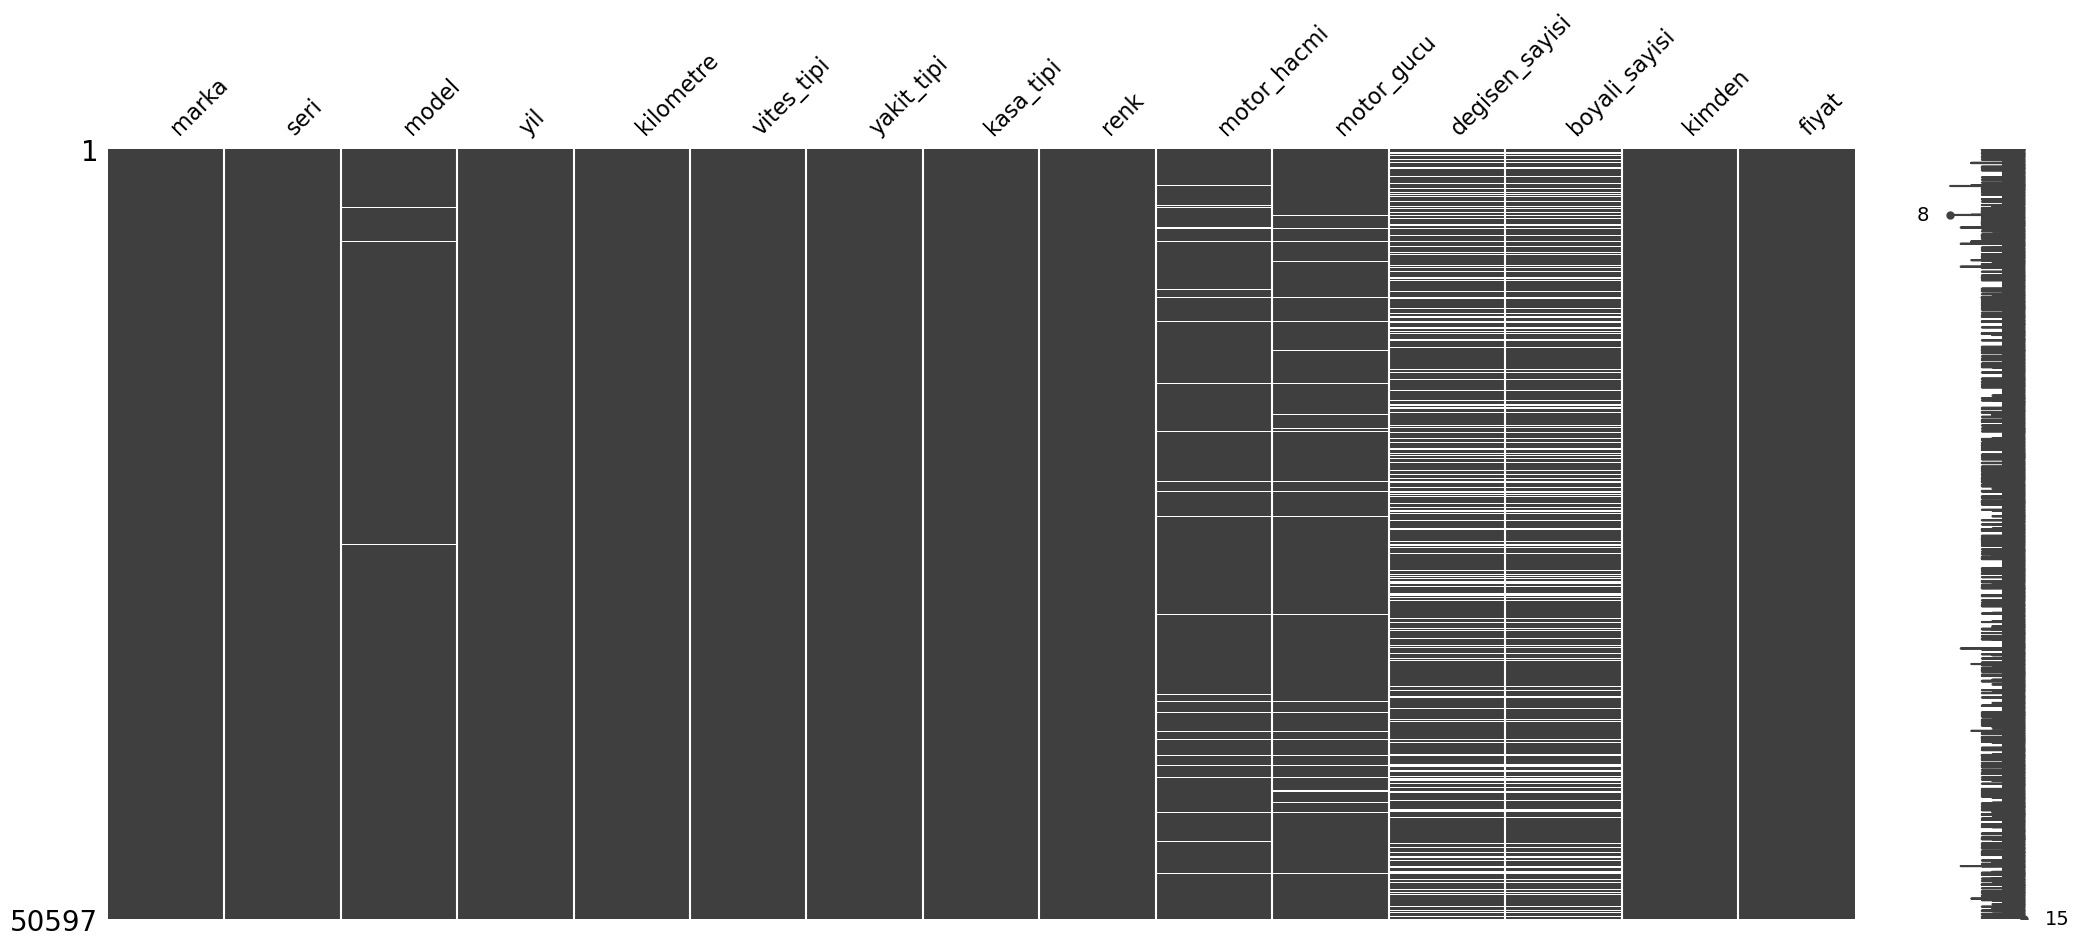

In [24]:
msno.matrix(df)
plt.show()

In [26]:
df["kasa_tipi"].unique()

array(['Sedan', 'Hatchback/5', 'Hatchback/3', 'Cabrio', 'Coupe', 'SUV',
       'Station wagon', 'Roadster', '-', 'MPV', nan, 'Pick-up'],
      dtype=object)

In [28]:
df[df["kasa_tipi"] == "-"]

,marka,seri,model,yil,kilometre,vites_tipi,yakit_tipi,kasa_tipi,renk,motor_hacmi,motor_gucu,degisen_sayisi,boyali_sayisi,kimden,fiyat
274,Bentley,Continental,GTC,2012.0,45350.0,Otomatik,Benzin,-,Bej,5998.0,560.0,0.0,0.0,Galeriden,11450000.0
340,Chrysler,Sebring,2.0 CRD Convertible,2008.0,187000.0,Düz,Benzin,-,Siyah,1968.0,140.0,0.0,0.0,Galeriden,949999.0
372,Chrysler,Sebring,2.7 Limited,2005.0,216000.0,Otomatik,LPG & Benzin,-,Gri (Gümüş),2736.0,203.0,1.0,1.0,Sahibinden,575000.0
438,Aston Martin,Virage,Volante,2012.0,81176.0,Otomatik,Benzin,-,Siyah,5935.0,490.0,NaN,NaN,Galeriden,9900000.0
810,Jaguar,F-Type,2.0i,2018.0,14000.0,Otomatik,Benzin,-,Beyaz,1997.0,300.0,0.0,0.0,Sahibinden,5500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47327,Volkswagen,EOS,1.6 FSi Comfortline,2007.0,188200.0,Düz,Benzin,-,Gri (Gümüş),1598.0,115.0,0.0,2.0,Sahibinden,725000.0
48374,BMW,3 Serisi,320Cd,2005.0,365000.0,Düz,Dizel,-,Siyah,1995.0,150.0,0.0,7.0,Galeriden,976500.0
48850,Opel,Astra,1.6 Enjoy,2007.0,224000.0,Düz,LPG & Benzin,-,Beyaz,1598.0,115.0,0.0,2.0,Sahibinden,515000.0
50245,Ford,Focus,1.6 TDCi Titanium,2007.0,225000.0,Düz,LPG & Benzin,-,Siyah,1596.0,100.0,NaN,NaN,Sahibinden,450000.0


In [30]:
len(df[df["kasa_tipi"] == "-"])

88

In [32]:
df = df[df["kasa_tipi"] != "-"]

In [34]:
df["kasa_tipi"].unique()

array(['Sedan', 'Hatchback/5', 'Hatchback/3', 'Cabrio', 'Coupe', 'SUV',
       'Station wagon', 'Roadster', 'MPV', nan, 'Pick-up'], dtype=object)

In [36]:
kayip_veri_yuzdesel = df.isnull().mean() * 100
kayip_veri_ozet = kayip_veri_yuzdesel[kayip_veri_yuzdesel > 0].sort_values(ascending=False)

for sutun, yuzde in kayip_veri_ozet.items():
    print(f"{sutun}: %{yuzde:.2f} eksik")

degisen_sayisi: %20.27 eksik
boyali_sayisi: %20.27 eksik
motor_gucu: %2.97 eksik
motor_hacmi: %2.90 eksik
model: %0.34 eksik
vites_tipi: %0.04 eksik
kasa_tipi: %0.03 eksik
renk: %0.00 eksik


In [38]:
# %1' in altinda eksik veri varsa o veri silinebilir
az_kayip_veri = df.columns[df.isnull().mean() < 0.01]
az_kayip_veri

Index(['marka', 'seri', 'model', 'yil', 'kilometre', 'vites_tipi',
       'yakit_tipi', 'kasa_tipi', 'renk', 'kimden', 'fiyat'],
      dtype='object')

In [40]:
df.dropna(subset=az_kayip_veri, inplace=True)

In [42]:
df.isnull().sum().sort_values(ascending=False)

degisen_sayisi    10169
boyali_sayisi     10169
motor_gucu         1460
motor_hacmi        1366
marka                 0
seri                  0
model                 0
yil                   0
kilometre             0
vites_tipi            0
yakit_tipi            0
kasa_tipi             0
renk                  0
kimden                0
fiyat                 0
dtype: int64

In [44]:
df["motor_hacmi"] = df.groupby(["marka", "model"])["motor_hacmi"].transform(lambda x : x.fillna(x.median()))

In [46]:
df.isnull().sum().sort_values(ascending=False)

degisen_sayisi    10169
boyali_sayisi     10169
motor_gucu         1460
motor_hacmi         353
marka                 0
seri                  0
model                 0
yil                   0
kilometre             0
vites_tipi            0
yakit_tipi            0
kasa_tipi             0
renk                  0
kimden                0
fiyat                 0
dtype: int64

In [48]:
df.dropna(subset="motor_hacmi", inplace=True)

In [50]:
df.isnull().sum().sort_values(ascending=False)

degisen_sayisi    10120
boyali_sayisi     10120
motor_gucu         1421
marka                 0
seri                  0
model                 0
yil                   0
kilometre             0
vites_tipi            0
yakit_tipi            0
kasa_tipi             0
renk                  0
motor_hacmi           0
kimden                0
fiyat                 0
dtype: int64

In [52]:
df["motor_gucu"] = df.groupby(["marka", "model"])["motor_gucu"].transform(lambda x : x.fillna(x.median()))

In [54]:
df.motor_gucu.isnull().sum()

19

In [56]:
df.dropna(subset="motor_gucu", inplace=True)

In [58]:
df.isnull().sum().sort_values(ascending=False)

degisen_sayisi    10113
boyali_sayisi     10113
marka                 0
seri                  0
model                 0
yil                   0
kilometre             0
vites_tipi            0
yakit_tipi            0
kasa_tipi             0
renk                  0
motor_hacmi           0
motor_gucu            0
kimden                0
fiyat                 0
dtype: int64

In [60]:
df.loc[(df["degisen_sayisi"].isnull()) & (df["boyali_sayisi"].notnull()), "degisen_sayisi"] = 0
df.loc[(df["boyali_sayisi"].isnull()) & (df["degisen_sayisi"].notnull()), "boyali_sayisi"] = 0

In [62]:
df.isnull().sum().sort_values(ascending=False)

degisen_sayisi    10113
boyali_sayisi     10113
marka                 0
seri                  0
model                 0
yil                   0
kilometre             0
vites_tipi            0
yakit_tipi            0
kasa_tipi             0
renk                  0
motor_hacmi           0
motor_gucu            0
kimden                0
fiyat                 0
dtype: int64

In [64]:
df["degisen_sayisi"] = df.groupby(["marka", "model", "yil"])["degisen_sayisi"].transform(lambda x : x.fillna(x.mode().iloc[0] if not x.mode().empty else x))

In [66]:
df["degisen_sayisi"].isnull().sum()

1099

In [68]:
df["degisen_sayisi"] = df.groupby(["marka", "model"])["degisen_sayisi"].transform(lambda x : x.fillna(x.mode().iloc[0] if not x.mode().empty else x))

In [70]:
df["degisen_sayisi"].isnull().sum()

285

In [72]:
df["boyali_sayisi"] = df.groupby(["marka", "model", "yil"])["boyali_sayisi"].transform(lambda x : x.fillna(x.mode().iloc[0] if not x.mode().empty else x))

In [74]:
df["boyali_sayisi"].isnull().sum()

1099

In [76]:
df["boyali_sayisi"] = df.groupby(["marka", "model"])["boyali_sayisi"].transform(lambda x : x.fillna(x.mode().iloc[0] if not x.mode().empty else x))

In [78]:
df["boyali_sayisi"].isnull().sum()

285

In [80]:
df.isnull().sum().sort_values(ascending=False)

degisen_sayisi    285
boyali_sayisi     285
marka               0
seri                0
model               0
yil                 0
kilometre           0
vites_tipi          0
yakit_tipi          0
kasa_tipi           0
renk                0
motor_hacmi         0
motor_gucu          0
kimden              0
fiyat               0
dtype: int64

In [82]:
df.dropna(subset="degisen_sayisi", inplace=True)

In [84]:
df.dropna(subset="boyali_sayisi", inplace=True)

In [86]:
df.isnull().sum().sort_values(ascending=False)

marka             0
seri              0
model             0
yil               0
kilometre         0
vites_tipi        0
yakit_tipi        0
kasa_tipi         0
renk              0
motor_hacmi       0
motor_gucu        0
degisen_sayisi    0
boyali_sayisi     0
kimden            0
fiyat             0
dtype: int64

In [88]:
df.shape

(49662, 15)

### Veri Tipi Değiştirme

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49662 entries, 0 to 50754
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   marka           49662 non-null  object 
 1   seri            49662 non-null  object 
 2   model           49662 non-null  object 
 3   yil             49662 non-null  float64
 4   kilometre       49662 non-null  float64
 5   vites_tipi      49662 non-null  object 
 6   yakit_tipi      49662 non-null  object 
 7   kasa_tipi       49662 non-null  object 
 8   renk            49662 non-null  object 
 9   motor_hacmi     49662 non-null  float64
 10  motor_gucu      49662 non-null  float64
 11  degisen_sayisi  49662 non-null  float64
 12  boyali_sayisi   49662 non-null  float64
 13  kimden          49662 non-null  object 
 14  fiyat           49662 non-null  float64
dtypes: float64(7), object(8)
memory usage: 6.1+ MB


In [93]:
sayisal_sutunlar = df.select_dtypes("float64").columns

In [95]:
for sutun in sayisal_sutunlar:
    df[sutun] = df[sutun].astype("int64")

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49662 entries, 0 to 50754
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   marka           49662 non-null  object
 1   seri            49662 non-null  object
 2   model           49662 non-null  object
 3   yil             49662 non-null  int64 
 4   kilometre       49662 non-null  int64 
 5   vites_tipi      49662 non-null  object
 6   yakit_tipi      49662 non-null  object
 7   kasa_tipi       49662 non-null  object
 8   renk            49662 non-null  object
 9   motor_hacmi     49662 non-null  int64 
 10  motor_gucu      49662 non-null  int64 
 11  degisen_sayisi  49662 non-null  int64 
 12  boyali_sayisi   49662 non-null  int64 
 13  kimden          49662 non-null  object
 14  fiyat           49662 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 6.1+ MB


In [99]:
df.head()

,marka,seri,model,yil,kilometre,vites_tipi,yakit_tipi,kasa_tipi,renk,motor_hacmi,motor_gucu,degisen_sayisi,boyali_sayisi,kimden,fiyat
0,Lexus,ES,300h Business Plus,2023,43000,Otomatik,Benzin,Sedan,Siyah,2250,213,1,1,Galeriden,4950000
2,Lexus,LS,500h Exclusive,2021,23665,Otomatik,Benzin,Sedan,Siyah,3250,363,0,0,Galeriden,9000000
4,Lexus,GS,200t F Sport,2016,90500,Otomatik,Benzin,Sedan,Beyaz,1900,238,0,0,Galeriden,2745000
5,Infiniti,I30,3.0,1996,230000,Otomatik,LPG & Benzin,Sedan,Yeşil,2988,190,0,7,Sahibinden,225000
6,Infiniti,I30,3.0,1996,298000,Otomatik,LPG & Benzin,Sedan,Yeşil,2988,190,0,7,Sahibinden,475000


### Aykırı Değer Analizi

In [102]:
df.shape

(49662, 15)

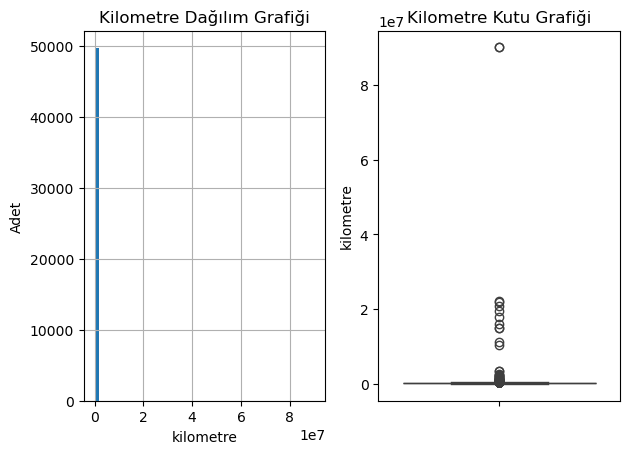

In [104]:
plt.subplot(1, 2, 1)
plt.hist(df["kilometre"], bins=50)
plt.title("Kilometre Dağılım Grafiği")
plt.xlabel("kilometre")
plt.ylabel("Adet")
plt.grid(True)

plt.subplot(1, 2, 2)
sns.boxplot(df["kilometre"])
plt.title("Kilometre Kutu Grafiği")
plt.tight_layout()
plt.show()

In [106]:
Q1 = df["kilometre"].quantile(0.25)
Q3 = df["kilometre"].quantile(0.75)
IQR = Q3 - Q1

alt_sinir = Q1 - 1.5 * IQR
ust_sinir = Q3 + 1.5 * IQR

df = df[(df["kilometre"] >= alt_sinir) & (df["kilometre"] <= ust_sinir)]

In [108]:
df.shape

(49196, 15)

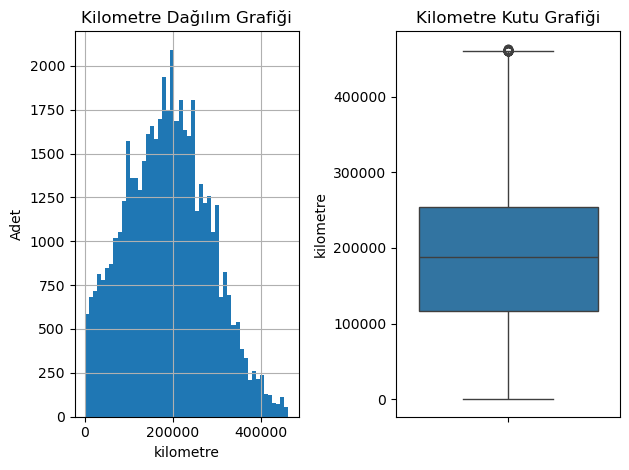

In [110]:
plt.subplot(1, 2, 1)
plt.hist(df["kilometre"], bins=50)
plt.title("Kilometre Dağılım Grafiği")
plt.xlabel("kilometre")
plt.ylabel("Adet")
plt.grid(True)

plt.subplot(1, 2, 2)
sns.boxplot(df["kilometre"])
plt.title("Kilometre Kutu Grafiği")
plt.tight_layout()
plt.show()

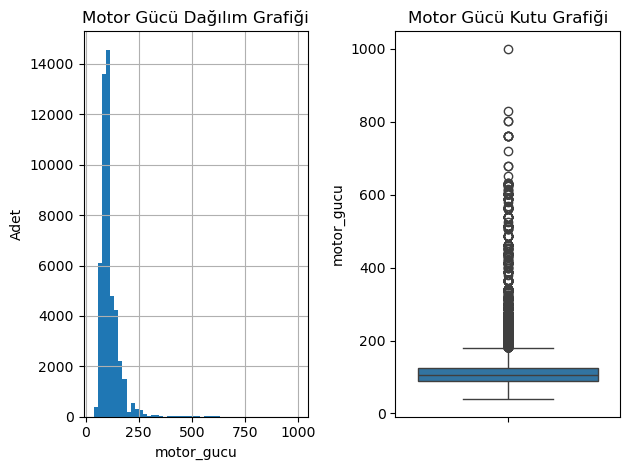

In [112]:
plt.subplot(1, 2, 1)
plt.hist(df["motor_gucu"], bins=50)
plt.title("Motor Gücü Dağılım Grafiği")
plt.xlabel("motor_gucu")
plt.ylabel("Adet")
plt.grid(True)

plt.subplot(1, 2, 2)
sns.boxplot(df["motor_gucu"])
plt.title("Motor Gücü Kutu Grafiği")
plt.tight_layout()
plt.show()

In [114]:
df = df[df["motor_gucu"] < 400]

In [116]:
df.shape

(48987, 15)

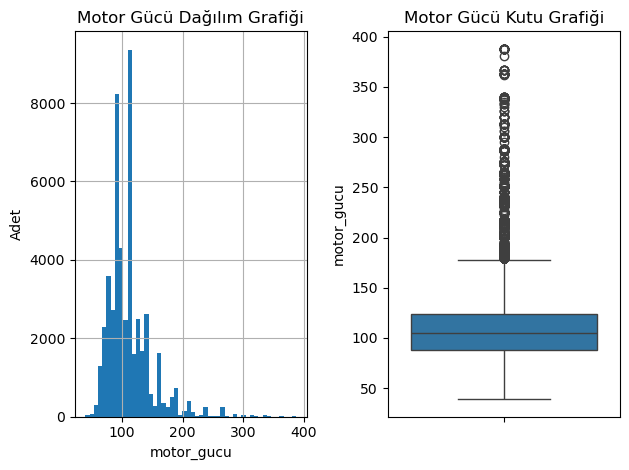

In [118]:
plt.subplot(1, 2, 1)
plt.hist(df["motor_gucu"], bins=50)
plt.title("Motor Gücü Dağılım Grafiği")
plt.xlabel("motor_gucu")
plt.ylabel("Adet")
plt.grid(True)

plt.subplot(1, 2, 2)
sns.boxplot(df["motor_gucu"])
plt.title("Motor Gücü Kutu Grafiği")
plt.tight_layout()
plt.show()

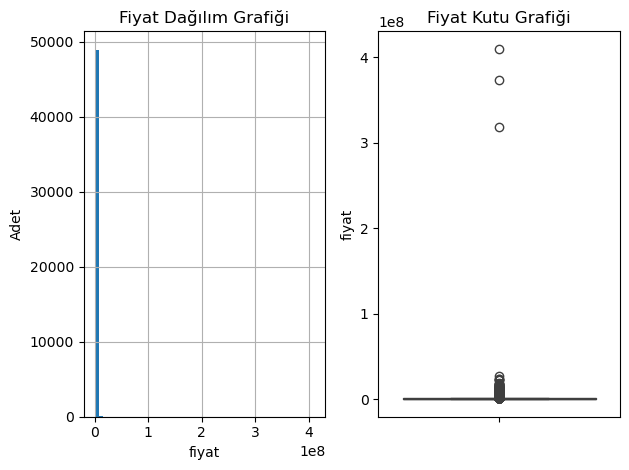

In [122]:
plt.subplot(1, 2, 1)
plt.hist(df['fiyat'], bins=50)
plt.title("Fiyat Dağılım Grafiği")
plt.xlabel("fiyat")
plt.ylabel("Adet")
plt.grid(True)

plt.subplot(1, 2, 2)
sns.boxplot(df["fiyat"])
plt.title("Fiyat Kutu Grafiği")
plt.tight_layout()
plt.show()

In [124]:
df = df[df["fiyat"] < 15000000]

In [126]:
df.shape

(48969, 15)

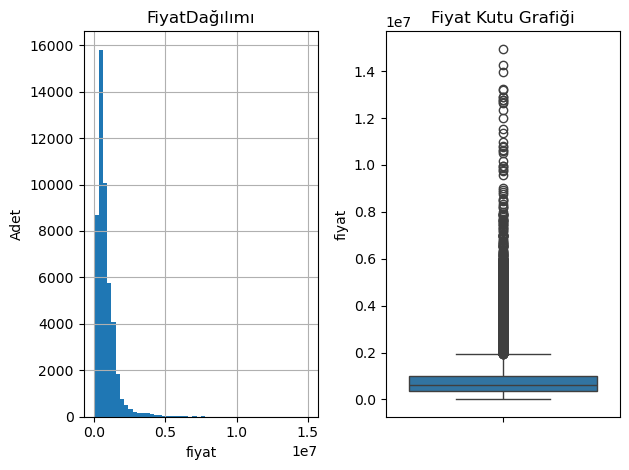

In [128]:
plt.subplot(1, 2, 1)
plt.hist(df['fiyat'], bins=50)
plt.title("FiyatDağılımı")
plt.xlabel("fiyat")
plt.ylabel("Adet")
plt.grid(True)

plt.subplot(1, 2, 2)
sns.boxplot(df["fiyat"])
plt.title("Fiyat Kutu Grafiği")
plt.tight_layout()
plt.show()

In [130]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
yil,48969.0,2010.379975,8.372904,1971.0,2005.0,2012.0,2016.0,2025.0
kilometre,48969.0,188856.077049,94398.847165,0.0,118000.0,189000.0,254000.0,463000.0
motor_hacmi,48969.0,1516.417897,287.749033,658.0,1372.0,1500.0,1596.0,6001.0
motor_gucu,48969.0,111.185362,37.522909,39.0,88.0,105.0,124.0,388.0
degisen_sayisi,48969.0,0.482652,0.885445,0.0,0.0,0.0,1.0,10.0
boyali_sayisi,48969.0,2.135494,2.967572,0.0,0.0,1.0,3.0,12.0
fiyat,48969.0,802685.758643,759047.655552,10000.0,365000.0,605000.0,999000.0,14950000.0


In [132]:
# Toplam temizlenen veri sayısı
print(f"Toplam temizlenen veri sayısı: {50597 - 48969}")

Toplam temizlenen veri sayısı: 1628


In [134]:
df.to_csv("temizlenmis_otomobil_verisi.csv", index=False)